# 主成分分析

1. 主成分分析について
2. データ作成
3. 分散共分散行列から相関行列を求める
4. Pandasから相関行列を求める
5. 固有値、固有ベクトル
6. 寄与率、累積寄与率
7. 主成分をプロット（現在進行中）
8. 今後の課題

## 1. 主成分分析について

多くの説明変数を持つ多次元データの情報量をできるだけ損なわずに、新しく合成された変数に置き換え、数を減らすことで、データの特徴が、より可視化され、データを新しい視点で解釈できるようにすることを** 主成分分析 **という。このようなプロセスを「次元の縮約」と呼ぶ。

例えば、散布図だけでは、データ全体の特徴や傾向、別のデータ郡との比較など把握しにくい。（説明変数が複数であれば、なおさら）

そこで全データの重心（平均値）を求め、**重心からデータの分散（バラつき）が最大となる方向を見つけ、軸（第1主成分軸）**を引く。  
**その軸と直交する方向に対して分散が最大となる方向を探し、軸（第2主成分軸）**を引く。  
これをデータの次元分繰り返す。（説明変数の数だけ軸ができる）

データのバラつきが大きい主成分軸のみで構成された座標上にデータをプロットしていくことで、データの関係性を把握し、新たな視点での解釈の気付きとなる。プロットの値は、各データの** 主成分得点 **より算出できる。  
**主成分得点：主成分軸である固有ベクトルの各要素に、実際のデータの値を掛けた総和**

逆にバラつきが少ない主成分軸はデータに共通するパターンなので、あまり意味をなさないと判断でき、切り捨てることができる。  
各主成分の** 寄与率 **を大きい順に足しあげていった** 累積寄与率 **が70～80％（目安）に達した以降の主成分軸は切り捨ての対象になり得る。  
**寄与率：ある主成分の分散と、すべての主成分の分散の総和、との割合**

https://qiita.com/supersaiakujin/items/138c0d8e6511735f1f45

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. データ作成

あるクラスの生徒10人の国社理英数の成績  
国語 / 社会 / 理科 は 100点満点  
英語 / 数学 は 200点満点

In [2]:
matrix = [
    [93, 100, 89, 168, 154],
    [100, 98, 89, 190, 172],
    [84, 84, 99, 170, 200],
    [70, 73, 92, 132, 154],
    [70, 72, 89, 132, 150],
    [66, 68, 95, 114, 164],
    [74, 70, 96, 186, 176],
    [74, 75, 95, 140, 158],
    [76, 77, 92, 156, 163],
    [79, 88, 100, 172, 200]
]
df = pd.DataFrame(
    matrix,
    index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    columns=['国語', '社会', '理科', '英語', '数学']
)

In [3]:
df

,国語,社会,理科,英語,数学
A,93,100,89,168,154
B,100,98,89,190,172
C,84,84,99,170,200
D,70,73,92,132,154
E,70,72,89,132,150
F,66,68,95,114,164
G,74,70,96,186,176
H,74,75,95,140,158
I,76,77,92,156,163
J,79,88,100,172,200


## 3. 分散共分散行列から相関行列を求める

### 分散共分散行列（共分散行列）
対角成分が分散で、そのほかの要素が共分散の行列

In [4]:
cov=df.cov()
cov

,国語,社会,理科,英語,数学
国語,116.711111,117.222222,-12.288889,206.666667,46.377778
社会,117.222222,132.500000,-10.777778,186.666667,49.500000
理科,-12.288889,-10.777778,16.488889,11.777778,59.600000
英語,206.666667,186.666667,11.777778,647.111111,251.555556
数学,46.377778,49.500000,59.600000,251.555556,330.322222


In [5]:
# 対角成分抽出
np.diag(cov)

array([116.71111111, 132.5       ,  16.48888889, 647.11111111,
       330.32222222])

In [6]:
# 各対角成分を -1/2乗
np.power(np.diag(cov),-0.5)

array([0.09256438, 0.08687445, 0.24626591, 0.03931068, 0.05502133])

In [7]:
# 対角行列を作成
D=np.diag(np.power(np.diag(cov),-0.5))
D

array([[0.09256438, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.08687445, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.24626591, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.03931068, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.05502133]])

In [8]:
# 対角行列と分散共分散行列の行列積
np.dot(D,cov)

array([[10.80329168, 10.85060236, -1.13751339, 19.12997194,  4.29293026],
       [10.18361591, 11.51086443, -0.9363135 , 16.21656373,  4.3002852 ],
       [-3.02633445, -2.65419929,  4.06065129,  2.90046521, 14.67744846],
       [ 8.12420748,  7.33799386,  0.46299247, 25.4383787 ,  9.88882029],
       [ 2.55176713,  2.72355596,  3.27927142, 13.84092188, 18.17476884]])

In [9]:
# さらに対角行列との行列積
np.dot(np.dot(D,cov),D)

array([[ 1.        ,  0.9426401 , -0.28013077,  0.75201223,  0.23620274],
       [ 0.9426401 ,  1.        , -0.2305821 ,  0.63748417,  0.23660742],
       [-0.28013077, -0.2305821 ,  1.        ,  0.11401926,  0.80757277],
       [ 0.75201223,  0.63748417,  0.11401926,  1.        ,  0.54409607],
       [ 0.23620274,  0.23660742,  0.80757277,  0.54409607,  1.        ]])

## 4. Pandasから相関行列を求める

In [10]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [11]:
df_std = pd.DataFrame(
    sc.fit_transform(df),
    index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    columns=['国語', '社会', '理科', '英語', '数学']
)

In [12]:
df_std

,国語,社会,理科,英語,数学
A,1.405029,1.785687,-1.194101,0.497245,-0.875763
B,2.088028,1.602540,-1.194101,1.408861,0.168193
C,0.526886,0.320508,1.401770,0.580119,1.792125
D,-0.839114,-0.686803,-0.415339,-0.994490,-0.875763
E,-0.839114,-0.778377,-1.194101,-0.994490,-1.107754
F,-1.229400,-1.144671,0.363422,-1.740358,-0.295788
G,-0.448829,-0.961524,0.623009,1.243113,0.400183
H,-0.448829,-0.503655,0.363422,-0.662994,-0.643773
I,-0.253686,-0.320508,-0.415339,0.000000,-0.353785
J,0.039029,0.686803,1.661357,0.662994,1.792125


In [13]:
# Pandasのcorr()メソッドは、列間の相関を計算
# ちなみにNumPyのcorrcoefはデフォルトでは行間の相関係数を計算

correlation_matrix=df_std.corr()
correlation_matrix

,国語,社会,理科,英語,数学
国語,1.000000,0.942640,-0.280131,0.752012,0.236203
社会,0.942640,1.000000,-0.230582,0.637484,0.236607
理科,-0.280131,-0.230582,1.000000,0.114019,0.807573
英語,0.752012,0.637484,0.114019,1.000000,0.544096
数学,0.236203,0.236607,0.807573,0.544096,1.000000


分散共分散行列からの相関行列と一致

## 5. 固有値、固有ベクトル

In [14]:
w,v=np.linalg.eig(correlation_matrix)

### 固有値
固有値は説明変数の数と一致  
値が大きい順に第１主成分、第２主成分、・・・、第５主成分

In [15]:
w

array([2.75351334, 1.85890988, 0.29707803, 0.02963954, 0.0608592 ])

### 固有ベクトル
固有ベクトルは、説明変数の数と一致  
固有ベクトル内の要素数も説明変数の数と一致

In [16]:
v

array([[ 0.55992543,  0.24599271,  0.13545814, -0.76330003,  0.15809885],
       [ 0.53756194,  0.23171743,  0.55348613,  0.50210283, -0.31445196],
       [ 0.02537413, -0.71904976,  0.21112241, -0.29800409, -0.59071523],
       [ 0.53860062, -0.08865464, -0.78316789,  0.17809881, -0.23870189],
       [ 0.32676627, -0.60075154,  0.13183163,  0.21151875,  0.6857125 ]])

## 6. 寄与率、累積寄与率

In [17]:
# 固有値の合計は、説明変数の数と一致？
w.sum()

4.999999999999996

In [18]:
# sorted()：元のリストはそのままで、並び替えられたリストを返す
w_sort=sorted(w, reverse=True)
w_sort

[2.753513342409681,
 1.858909881571479,
 0.2970780266174042,
 0.06085920491248133,
 0.029639544488949652]

In [19]:
# 各主成分の寄与率：（固有値 / 固有値の数）*100→つまり１説明変数あたりの固有値の値は1
for i in range(5):
    print("第"+str(i+1)+"主成分寄与率：",w_sort[i]/len(w)*100)

第1主成分寄与率： 55.07026684819362
第2主成分寄与率： 37.17819763142958
第3主成分寄与率： 5.941560532348084
第4主成分寄与率： 1.2171840982496265
第5主成分寄与率： 0.592790889778993


第2主成分までで、累積寄与率が90％を超えている。

## 7. 主成分をプロット（現在進行中）
分析結果を検討する。

In [20]:
# 第1主成分得点
z1=np.dot(df_std,v[0])
z1

array([ 0.54622219,  0.35281   ,  0.40426831, -0.07441368, -0.2391071 ,
        0.36092702, -1.28904637,  0.07830558, -0.33308183,  0.19311587])

In [21]:
# 第2主成分得点
z2=np.dot(df_std,v[1])
z2

array([ 1.0332004 ,  1.48736764,  0.86110362, -1.06405549, -1.44335843,
       -1.50579766,  0.37908389, -0.28728513, -0.32927515,  0.86901631])

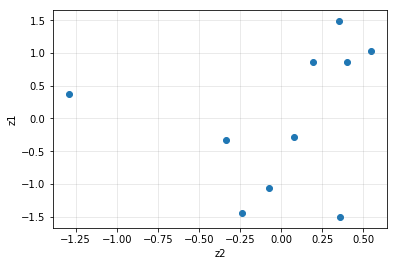

In [22]:
plt.scatter(z1,z2)
plt.xlabel("z2")
plt.ylabel("z1")
#plt.hlines([0],-2,2)  # y=0を描画
#plt.vlines([0],-2,2)  # x=0を描画
plt.grid(color='gray', alpha=0.2)
plt.show()

## 8. 今後の課題

- 主成分分析が、なぜ固有値、固有ベクトル問題になるのか。（まずは、ラグランジュの未定乗数法をキャッチアップ）
- なぜ固有値の合計は、説明変数の数と一致するのか。